In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#11 สร้าง box plot ของ features ที่สนใจ
df = pd.read_csv('clean_data.csv')
df

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcc_present,ba_present,htn_,dm_,cad_,poor_appet,anemia_,pedal_edema,ckd_
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,0,0,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,0,0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,0,0,0,1,0,1,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,1,0,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,0,0,0,0,0,0,0,0,0
389,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,0,0,0,0,0,0,0,0,0
390,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,0,0,0,0,0,0,0,0,0
391,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,0,0,0,0,0,0,0,0,0


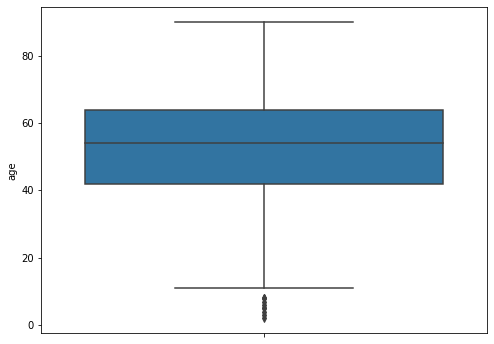

In [5]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(y='age',data=df)

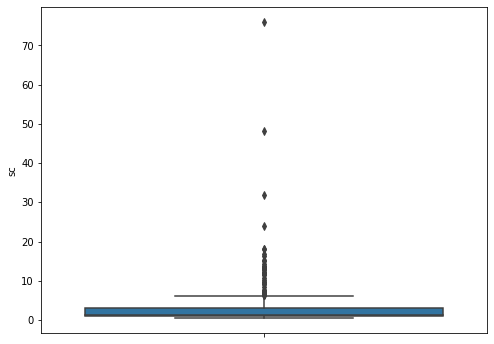

In [7]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(y='sc',data=df)

In [19]:
#12 สร้าง train/test split ของข้อมูล สามารถลองทดสอบ 70:30, 80:20, 90:10 ratio ได้ตามใจ
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [15]:
#13 ทำ Data Visualization อื่นๆ
#14 ทำ Data Cleaning โดยการลบ หรือ fill average ขึ้นอยู่กับความเหมาะสม  --> ทำแล้วในpart1

In [ ]:
#15.1 เลือก features ที่สนใจนำมาเทรน 

In [9]:
'''
จาก df.corr สนใจ feature ดังนี้
sg, al, hemo, htn_, dm_ 
'''

'\nจาก df.corr สนใจ feature ดังนี้\nsg, al, hemo, htn_, dm_ \n'

In [10]:
X = df[['sg','al','hemo','htn_','dm_']]
X

,sg,al,hemo,htn_,dm_
0,1.020,1.0,15.4,1,1
1,1.020,4.0,11.3,0,0
2,1.010,2.0,9.6,0,1
3,1.005,4.0,11.2,1,0
4,1.010,2.0,11.6,0,0
...,...,...,...,...,...
388,1.020,0.0,15.7,0,0
389,1.025,0.0,16.5,0,0
390,1.020,0.0,15.8,0,0
391,1.025,0.0,14.2,0,0


In [11]:
y = df['ckd_']
y

0      1
1      1
2      1
3      1
4      1
      ..
388    0
389    0
390    0
391    0
392    0
Name: ckd_, Length: 393, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [14]:
y_train

339    0
329    0
337    0
373    0
305    0
      ..
343    0
359    0
323    0
280    0
8      1
Name: ckd_, Length: 314, dtype: int64

In [16]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
predicted = logistic_regression.predict(X_test)

In [18]:
predicted

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [20]:
print(confusion_matrix(y_test,predicted))

[[23  2]
 [ 2 52]]


In [21]:
print('Accuracy = ', accuracy_score(y_test,predicted))
print('F1-Score = ', f1_score(y_test,predicted))
print('Precision = ', precision_score(y_test,predicted))
print('Recall = ', recall_score(y_test,predicted))

Accuracy =  0.9493670886075949
F1-Score =  0.9629629629629629
Precision =  0.9629629629629629
Recall =  0.9629629629629629


In [ ]:
#15.2 เลือก features ทั้งหมด

In [23]:
X2 = df.drop('ckd_', axis=1)
X2

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcc_present,ba_present,htn_,dm_,cad_,poor_appet,anemia_,pedal_edema
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,0,0,0,1,0,1,1,0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,0,0,0,0,0,0,0,0
389,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,0,0,0,0,0,0,0,0
390,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,0,0,0,0,0,0,0,0
391,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,0,0,0,0,0,0,0,0


In [25]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=100)

In [26]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X2_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
predicted2 = logistic_regression.predict(X2_test)

In [29]:
predicted2

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [30]:
print(confusion_matrix(y_test,predicted2))

[[22  3]
 [ 0 54]]


In [31]:
print('Accuracy = ', accuracy_score(y_test,predicted2))
print('F1-Score = ', f1_score(y_test,predicted2))
print('Precision = ', precision_score(y_test,predicted2))
print('Recall = ', recall_score(y_test,predicted2))

Accuracy =  0.9620253164556962
F1-Score =  0.972972972972973
Precision =  0.9473684210526315
Recall =  1.0


In [ ]:
#16 วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision แล้วดูว่าแบบ features ที่เราเลือกมา กับ แบบเลือกทุก features แบบใดให้ผลลัพธ์ที่ดีกว่า
